In [1]:
#Usage
#python3 plot-oligostate.py <.pdb file> <.xtc file> oligo-highest-size.dat <simulation time in nanoseconds(ns)>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import genfromtxt
import numpy as np
import subprocess as sp
import os as os
import sys
import pandas as pd
import mdtraj as md
import matplotlib

In [11]:
ref_structure=r"C:\Users\zhang\Work\Analysis\Traj\050\ALK2\Run2\ALKPep2_Run2_50_npt_eq.pdb"
traj         =r"C:\Users\zhang\Work\Analysis\Traj\050\ALK2\Run2\ALKPep2_Run2_50_protein_final.xtc"
inp          ="ALK2_50_Run2_oligo_highest_size.dat"
Name         ="ALKPep2"
Name1        ="ALK2_50_Run2"
sim_t        =int(1000) #Simulation time in nano-seconds

In [3]:
#structure parameters

topology   = md.load(ref_structure).topology
trajectory = md.load(traj, top=ref_structure)
frames     =trajectory.n_frames #Number of frames
chains=topology.n_chains   #Number of chains
atoms=int(topology.n_atoms/chains) #Number of atoms in each monomer 
AminoAcids = int(topology.n_residues/chains) #Number of residues per chain ('-2' avoid the N- and C- cap residues as individual residues)
#adj=frames/sim_t #Snaphots saved every "adj" ns
adj=int(5)
chains

50

In [4]:
inp

'ALK2_50_Run2_oligo_highest_size.dat'

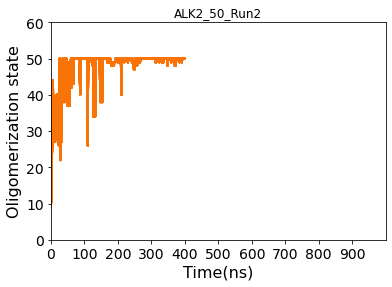

In [13]:
for i in range(len(inp)):
    data = genfromtxt(inp)
    #print (data)
    plt.plot(data[:,0], data[:,1], linewidth=2, linestyle='-', color = '#F97306')

plt.xlim(0, sim_t)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 1000, step=100))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


pyplot.ylabel('Oligomerization state', fontsize=16)
pyplot.xlabel('Time(ns)', fontsize=16)
plt.title(Name1)
plt.savefig(Name+'_Oligomerisation_state.png', bbox_inches='tight', dpi=400)
plt.show()